# Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.


Resumen estadístico de las variables:
        PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.383838    2.308642                      NaN   NaN   
std      257.353842    0.486592    0.836071                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      223.500000    0.000000    2.000000                      NaN   NaN   
50%      446.000000    0.000000    3.000000                      NaN   NaN   
75%      668.500000    1.000000    3.000000                      NaN   NaN   
max      891.000000    1.000000    3.000000                      NaN   NaN   

               Age       

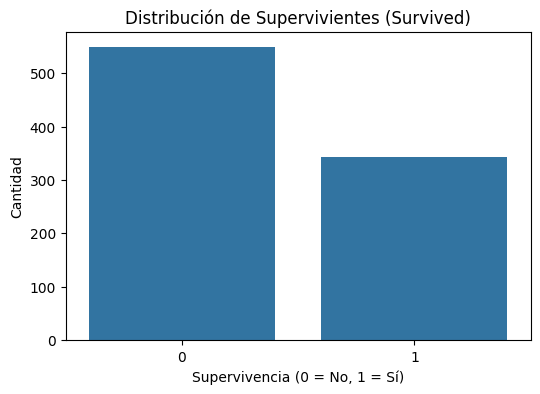

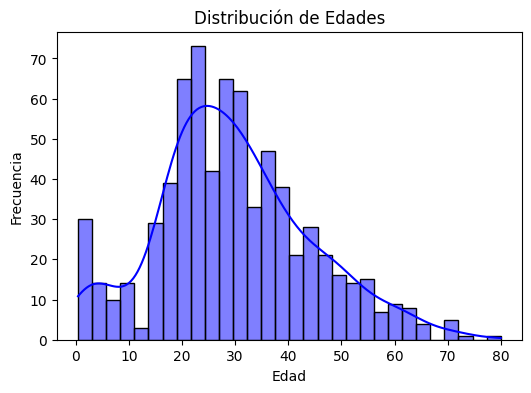

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Cargar los datos
df = pd.read_csv('Titanic-Dataset.csv')

# Resumen estadístico
print("Resumen estadístico de las variables:")
print(df.describe(include="all"))

# Distribución de la variable objetivo "Survived"
plt.figure(figsize=(6, 4))
sns.countplot(x="Survived", data=df,)
plt.title("Distribución de Supervivientes (Survived)")
plt.xlabel("Supervivencia (0 = No, 1 = Sí)")
plt.ylabel("Cantidad")
plt.show()

# Distribución de la edad
plt.figure(figsize=(6, 4))
sns.histplot(df["Age"], kde=True, color="blue", bins=30)
plt.title("Distribución de Edades")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

## Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [57]:
from sklearn.preprocessing import LabelEncoder

# Codificar columnas categóricas en X
label_encoder = LabelEncoder()
categorical_columns = X.select_dtypes(include=['object']).columns  # Detectar columnas categóricas

for column in categorical_columns:
    X[column] = label_encoder.fit_transform(X[column].astype(str))

# Verificar la transformación
print(X.head())

   PassengerId  Pclass  Name   Age  SibSp  Parch  Ticket     Fare  Cabin  \
0            1       3   108  22.0      1      0     523   7.2500    147   
1            2       1   190  38.0      1      0     596  71.2833     81   
2            3       3   353  26.0      0      0     669   7.9250    147   
3            4       1   272  35.0      1      0      49  53.1000     55   
4            5       3    15  35.0      0      0     472   8.0500    147   

   Sex_male  Embarked_Q  Embarked_S  
0      True       False        True  
1     False       False       False  
2     False       False        True  
3     False       False        True  
4      True       False        True  


# Dividir los Datos en Conjunto de Entrenamiento y Prueba:

In [58]:
from sklearn.preprocessing import LabelEncoder



# Rellenar los valores nulos
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)  # Aunque y debería tener pocos valores nulos


# Dividir en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar las dimensiones de los conjuntos
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(712, 12) (179, 12) (712,) (179,)


# Entrenar el Modelo de Regresión Lineal

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verificar las primeras filas del conjunto escalado
print(X_train_scaled[:5])

model = LogisticRegression(max_iter=1000)

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train_scaled, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

# Verificar las primeras predicciones
print(y_pred[:5])

[[-0.45306593 -1.61413602  0.71732642  1.22920747 -0.47072241 -0.47934164
  -1.58638267 -0.07868358 -2.08825118  0.7243102  -0.30335547  0.59248936]
 [ 1.11387354 -0.40055118 -1.43097537 -0.50350514 -0.47072241 -0.47934164
  -0.54683874 -0.37714494  0.44573085  0.7243102  -0.30335547  0.59248936]
 [-0.25427511  0.81303367  1.39328395  0.18957991 -0.47072241 -0.47934164
   1.63720308 -0.47486697  0.44573085  0.7243102  -0.30335547  0.59248936]
 [ 1.00083562  0.81303367 -0.49085053 -0.27247679  0.37992316 -0.47934164
   0.30278851 -0.47623026  0.44573085  0.7243102  -0.30335547  0.59248936]
 [ 1.42570229  0.81303367 -1.66794898 -1.81266577  2.93185988  2.04874166
  -0.02206897 -0.02524937  0.44573085 -1.38062393 -0.30335547  0.59248936]]
[0 0 0 1 1]


In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Convertir predicciones continuas en etiquetas binarias (umbral = 0.5)
y_pred_binary = (y_pred >= 0.5).astype(int)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print("Evaluación del Modelo (Clasificación Binaria):")
print(f"Precisión (Accuracy): {accuracy:.2f}")
print(f"Precisión (Precision): {precision:.2f}")
print(f"Sensibilidad (Recall): {recall:.2f}")
print(f"Puntaje F1 (F1-Score): {f1:.2f}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print("\nMatriz de Confusión:")
print(conf_matrix)

# Informe completo
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_binary))


Evaluación del Modelo (Clasificación Binaria):
Precisión (Accuracy): 0.82
Precisión (Precision): 0.78
Sensibilidad (Recall): 0.77
Puntaje F1 (F1-Score): 0.78

Matriz de Confusión:
[[89 16]
 [17 57]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       105
           1       0.78      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

